# **Sentiment Analysis**

This is a notebook containing **Sentiment Analysis** Mini Project on *Amazon Musical Instruments Reviews*. I am interested in Natural Language Processing and that is my motivation to make this project. I think that sentiment analysis has a really powerful impacts in business developments because we can gain so many insights from here.

# Libraries

**Data Libraries**

**pandas** for data manipulation and analysis.

**numpy** for numerical operations and arrays.

**matplotlib.pyplot** for data visualization.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**NLP Text Libraries**

In [24]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\Dhiman
[nltk_data]     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dhiman
[nltk_data]     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dhiman
[nltk_data]     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**EDA Analysis**

**TextBlob** for analyzing the sentiment of text data.

**CountVectorizer** from sklearn.feature_extraction.text for converting text data into a matrix of word frequency features.

**WordCloud** for visualizing the most frequent words in the text data as a word cloud.

In [25]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

**Feature Engineering**

**LabelEncoder** from sklearn.preprocessing for encoding target labels.

**TfidfVectorizer** from sklearn.feature_extraction.text for converting text data into a matrix of TF-IDF features.

**SMOTE** from imblearn.over_sampling for resampling the dataset to address class imbalance.

**Counter** from collections for counting the occurrence of each class in the dataset.

**train_test_split** from sklearn.model_selection for splitting the dataset into training and testing sets.

In [26]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

**Model Selection and Evaluation**

**SVC** from sklearn.svm for Support Vector Classification.

**LogisticRegression** from sklearn.linear_model for logistic regression.

**RandomForestClassifier** from sklearn.ensemble for random forest classification.

**BernoulliNB** from sklearn.naive_bayes for Bernoulli Naive Bayes classification.

**KNeighborsClassifier** from sklearn.neighbors for k-nearest neighbors classification.

**cross_val_score from sklearn.model_selection** for evaluating a model's performance using cross-validation.

**GridSearchCV** from sklearn.model_selection for hyperparameter tuning using a grid search.

**confusion_matrix, accuracy_score, and classification_report** from sklearn.metrics for evaluating the performance of a classification model.

In [27]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



---



# The Dataset

*The dataset that we will use is taken from `Kaggle` website and can be downloaded here:*

[`Amazon Musical Instruments Reviews`](https://www.kaggle.com/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv)

*The dataset generally discusses the feedback people provided after purchasing musical instruments from "Amazon."*

**Read The Dataset**

In [28]:
dataset = pd.read_csv("Instruments_Reviews.csv")

**Shape of The Dataset**

In [29]:
dataset.shape

(10261, 9)

*From this, we can infer that the dataset consists of 10261 rows and 9 columns.*



---



# Data Preprocessing

**Checking Null Values**

In [30]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

*From above, there are two columns in the dataset with null values: `reviewText` and `reviewerName`. While the latter one is not really important, we should focus on the first column. We cannot remove these rows because the ratings and summary given from the customers will have some effects to our model later (although the number of missing rows is small). Because of it, we can fill the empty values with an empty string.*

**Filling Missing Values**

In [33]:
dataset.reviewText.fillna(value = "", inplace = True)

**Concatenate `reviewText` and `summary` Columns**

In [34]:
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

**Statistic Description of The Dataset**

In [35]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10261
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6796,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN


*We can infer from the description above that the customer ratings will fall within the [1, 5] range. Additionally, 4.48 is the average rating given to sold musical instruments. We can also see that our new column, "reviews," combines the words "summary" and "reviewText."*

**Percentages of Ratings Given from The Customers**

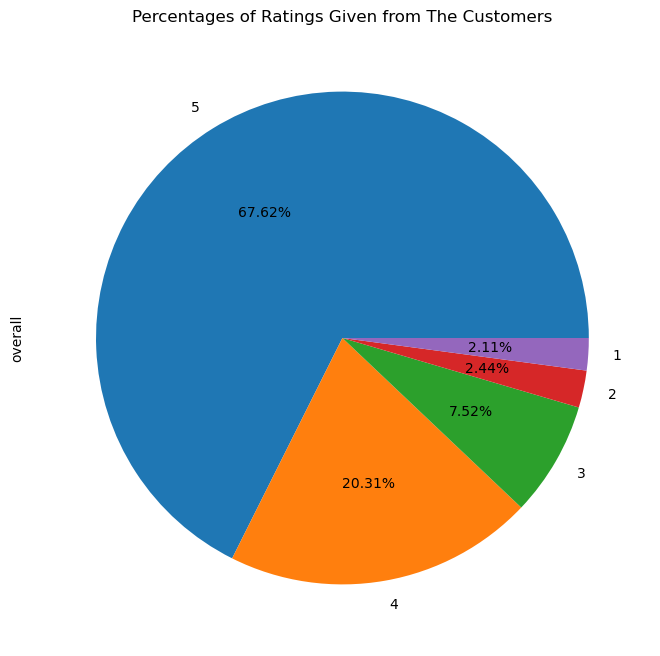

In [36]:
dataset.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

*Based on the chart, we can see that a significant portion of musical instruments sold on Amazon have received perfect ratings of 5.0, indicating that they are in good condition. To simplify the sentiment analysis task, we can categorize the ratings as positive (above 3), neutral (equal to 3), and negative (under 3). Also, it's worth noting that the number of negative reviews in the dataset is relatively low, which could potentially impact the performance of our model.*

**Labelling Products Based On Ratings Given**

*Our dataset does not have a target variable or something we want to predict. To address this, we will assign each review in the dataset a sentiment label based on its rating. Reviews with ratings above 3 will be labeled as Positive, reviews with a rating of 3 will be labeled as Neutral, and reviews with ratings below 3 will be labeled as Negative.*

In [16]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [17]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

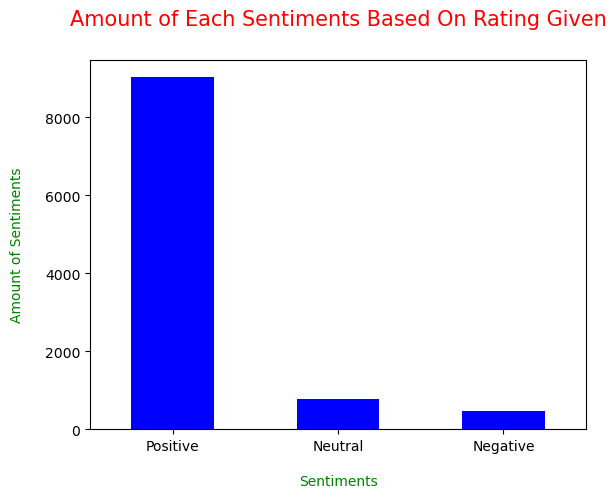

In [18]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

*The chart reveals that the majority of reviews are labeled as positive, which aligns with our initial finding during the data exploration stage.*



---



# Text Preprocessing

**Text Cleaning**

**Convert all text to lowercase**: This step helps to standardize the text data, so that upper and lowercase letters are treated as the same.

**Remove punctuations**: Punctuations are not essential for sentiment analysis, so we remove them from the text.

**Remove numbers**: Since numbers may not carry much meaning for sentiment analysis, we remove them from the text.

**Remove links**: Links are usually not relevant for sentiment analysis, so we remove them from the text.

**Delete newlines**: Newlines can add unnecessary whitespace to the text, which can affect the performance of the sentiment analysis model. Therefore, we remove them from the text.

In [19]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

**Text Processing**

**Tokenize the text**: This step involves splitting the text into individual words or tokens. Tokenization makes it easier to work with text data, since we can analyze individual words rather than entire sentences.

**Remove stopwords**: Stopwords are common words that are usually not relevant for sentiment analysis, such as "the", "a", "an", etc. By removing stopwords, we can reduce the dimensionality of the text data and make it easier to analyze.

**Lemmatize the words**: Lemmatization involves reducing words to their base form, or lemma. For example, the word "running" might be lemmatized to "run". This step helps to standardize the text data and reduce noise.

**The Text_Processing function ultimately returns a cleaned and processed version of the input text. These preprocessing steps help to reduce noise in the text data and make it easier to analyze and model.**

In [24]:
#nltk stands for Natural Language Toolkit. It is a popular Python library for working with human language data. 
#It provides a set of tools and functions for tasks such as tokenization, stemming, lemmatization, parsing, and more.

import nltk
nltk.download('all')
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  Tokens = nltk.word_tokenize(Text)

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |   

[nltk_data]    |   Unzipping corpora\movie_reviews.zip.
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\mte_teip5.zip.
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | Downloading package names to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\names.zip.
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to C:\Users\Dhiman
[nltk_data]   

[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\twitter_samples.zip.
[nltk_data]    | Downloading package udhr to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\udhr.zip.
[nltk_data]    | Downloading package udhr2 to C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\udhr2.zip.
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\unicode_samples.zip.
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Dhiman
[nltk_data]    |     Thakuria\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\universal_tagset.zip.
[nltk_data]    | Downloading pac

**Applying The Functions**

**The first line is using a lambda function to apply the "Text_Cleaning" function to each value in the "reviews" column.** 

**The second line is using another lambda function to apply the "Text_Processing" function to each value in the "reviews" column.** 

In [25]:
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))



---



# Exploratory Data Analysis

**Overview of The Dataset**

In [26]:
dataset.head(n = 10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


*We need to use the reviews aspect of our dataset to predict the sentiment of each review. In other words, we will try to guess if the review is positive, neutral, or negative based on the words used in the review.*

**About Other Features**

In [27]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10254,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013",good string five star,Positive
freq,42,163,66,6796,NaN,NaN,40,3,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


*Now we will revisit the statistical description of our dataset. Based on intuition, the other features in our dataset don't seem to have much impact in determining the sentiment later on. While we may use the helpful feature in our model, the fact that most values are [0, 0] indicates that most users do not tend to vote on the helpfulness of the reviews. Therefore, we can also conclude that this feature is not particularly useful for our model.*

**Polarity, Review Length, and Word Counts**

*We will now continue our analysis by exploring the polarity of the texts and the words used in the reviews. This involves creating new columns in our dataset and visualizing them to gain a better understanding of the data.*

Polarity

In [28]:
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

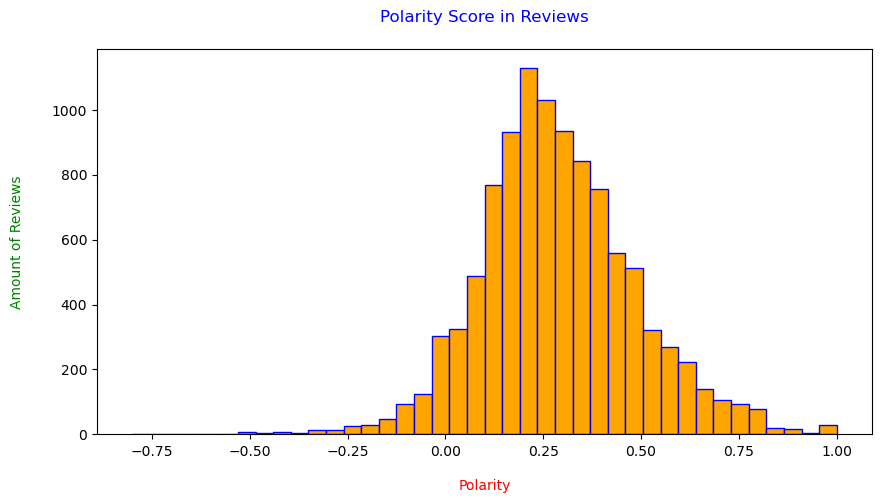

In [29]:
dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

*The polarity of a review tells us whether the sentiment of the review is negative, neutral or positive. Negative reviews have polarity values in the range of [-1, 0), neutral reviews have a polarity value of 0.0, while positive reviews have polarity values in the range of (0, 1].

From the histogram, we can see that most of the reviews have positive sentiment, which confirms our earlier analysis. The histogram also shows that the data is normally distributed but not with standard distribution. Therefore, our analysis about the amount of sentiment in the reviews is correct and is supported by the histogram.*

Review Length

In [30]:
dataset["length"] = dataset["reviews"].astype(str).apply(len)

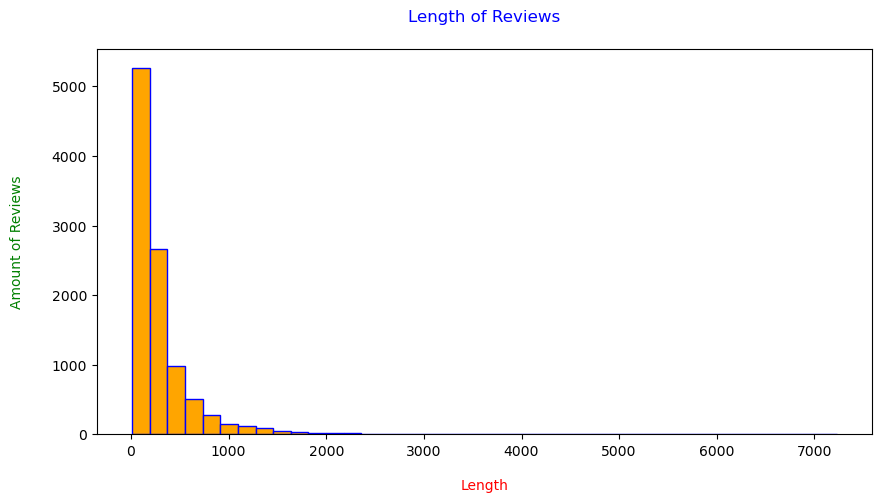

In [31]:
dataset["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

*We found out that our reviews have a text length of around 0-1000 characters. The distribution is skewed to the right, meaning most reviews have a shorter length. However, this length might not be accurate as we preprocessed the text and some words might have been removed. This also applies when we count the total number of words in our reviews.*

Word Counts

In [32]:
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

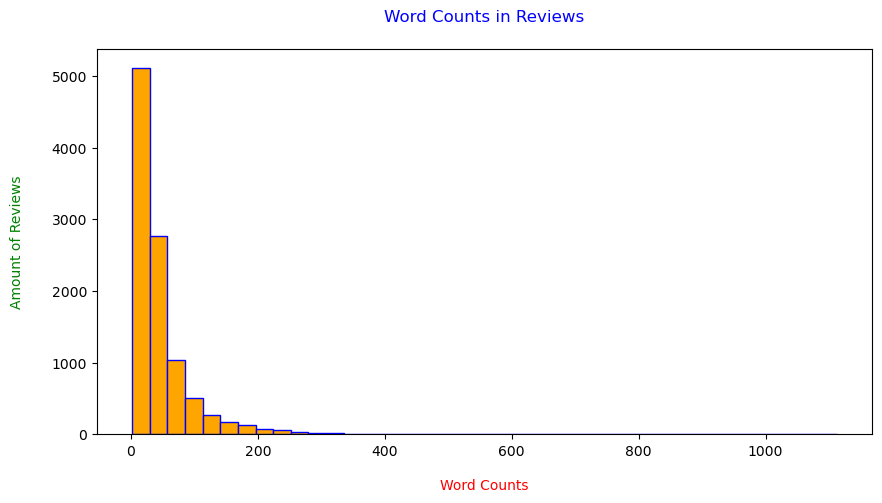

In [33]:
dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

*The graph shows that the majority of the reviews contain 0-200 words. Similar to the previous observation, the distribution is skewed to the right, and the word count is influenced by the text preprocessing done earlier.*



---



# N-Gram Analysis

**N-gram analysis is a method that helps us identify commonly recurring sequences of N words (unigrams, bigrams, trigrams, etc.) in a text or dataset. By analyzing the frequency of these sequences, we can learn about the language patterns and structure of the text or dataset.

**N-Gram Function**

**=>The code below is a function called Gram_Analysis. It needs three inputs: Corpus (a list of texts), Gram (an integer that represents the length of the n-gram), and N (an integer that represents how many of the most common n-grams to return).**

**=>It creates a 'CountVectorizer' object that removes stopwords and has the n-gram range that we specified.**

**=>It uses the 'fit_transform' method of the Vectorizer object to create an n-grams matrix from the Corpus.**

**=>It counts how many times each n-gram appears in the 'Corpus'.**

**=>It sorts the n-grams by their frequency and stores them in a list of tuples.
Finally, it returns the N most frequent n-grams as a list of tuples.**

In [34]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

**Filter The DataFrame Based On Sentiments**

In [35]:
# Use dropna() so the base DataFrame is not affected
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

**Unigram of Reviews Based on Sentiments**

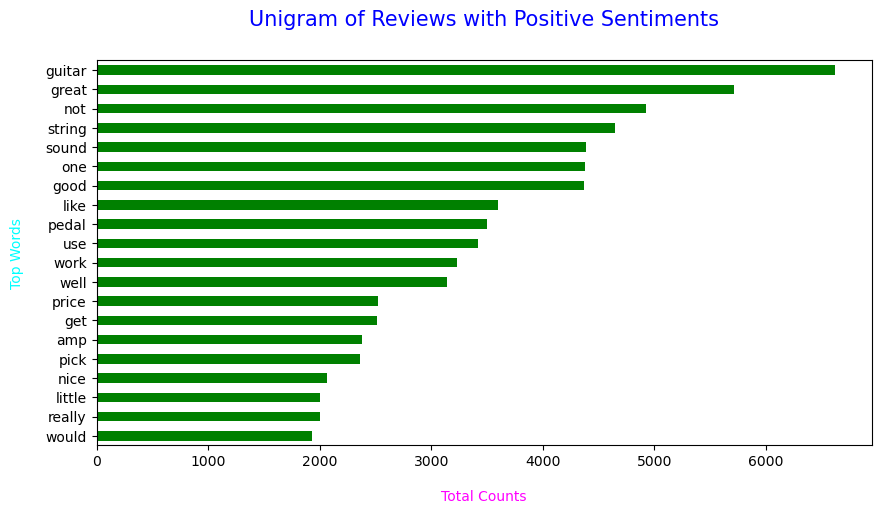

In [40]:
# Finding Unigram
words = Gram_Analysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

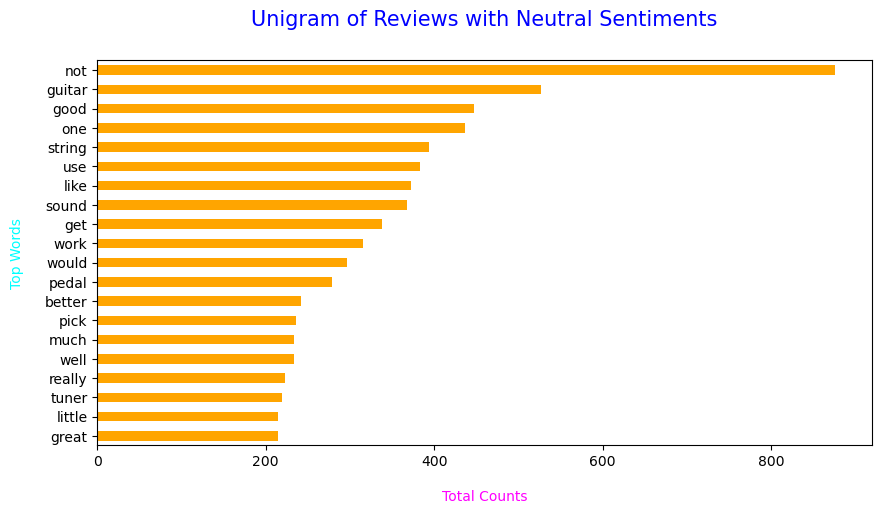

In [41]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

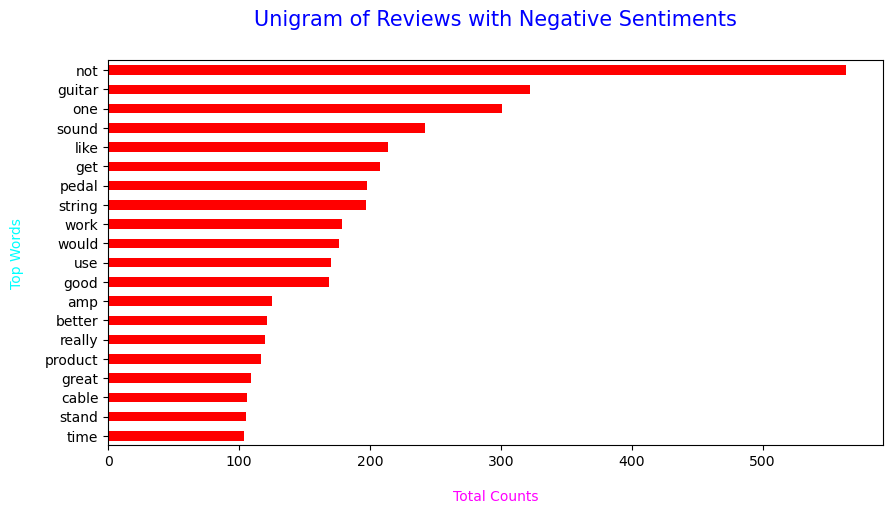

In [43]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*The list of most common single words (unigrams) is not entirely accurate because even for positive reviews, the top word is "guitar", which is an object. However, we can still infer that the most frequently purchased items are guitars or related to them. *

**Bigram of Reviews Based On Sentiments**

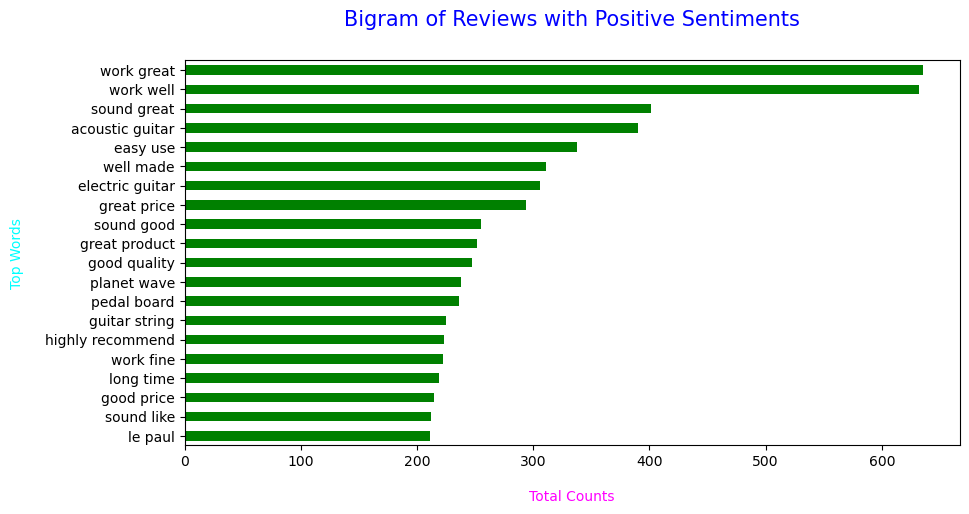

In [44]:
# Finding Bigram
words = Gram_Analysis(Positive["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

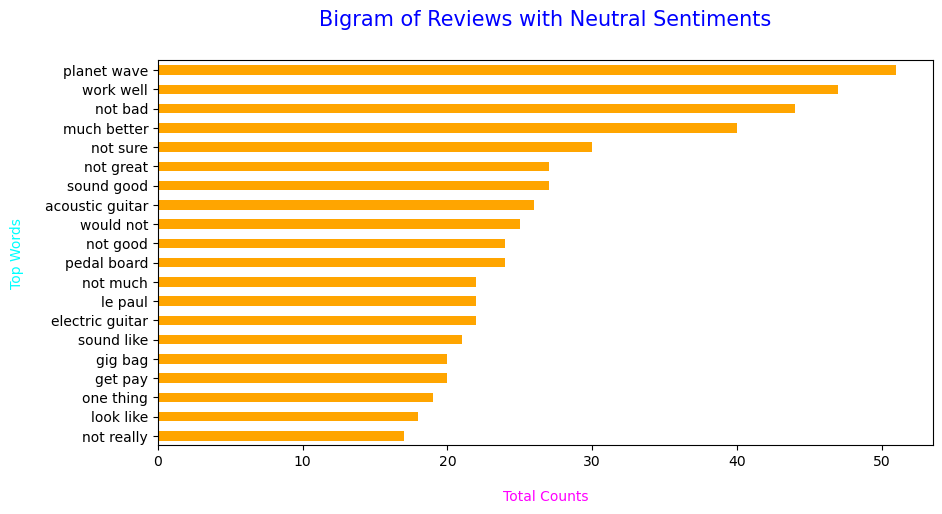

In [45]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

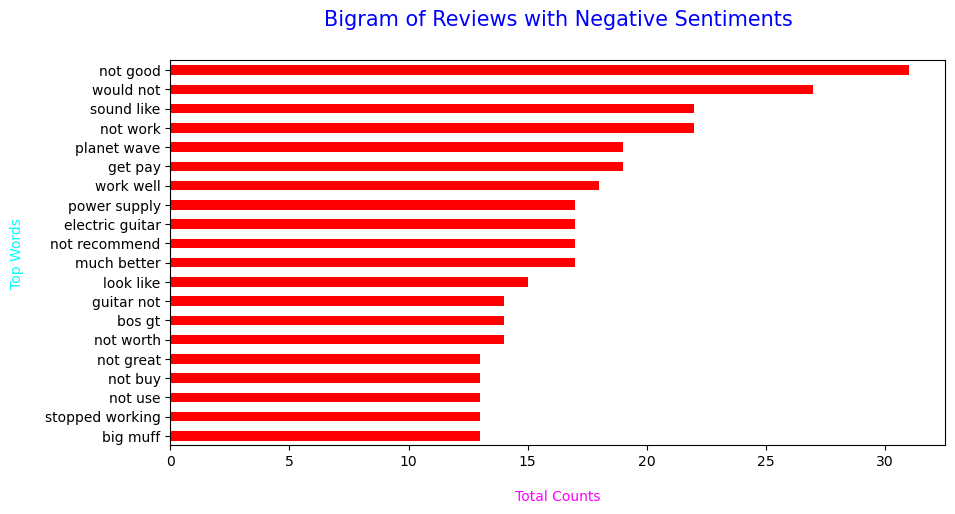

In [46]:
# Finding Bigram
words = Gram_Analysis(Negative["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*Bigrams provide more accurate descriptions of sentiments compared to unigrams, as they capture phrases that are more indicative of positive or negative sentiment. However, some bigrams still contain object names such as "acoustic guitar," which suggests that the top-selling items may indeed be guitars.*

**Trigram of Reviews Based On Sentiments**

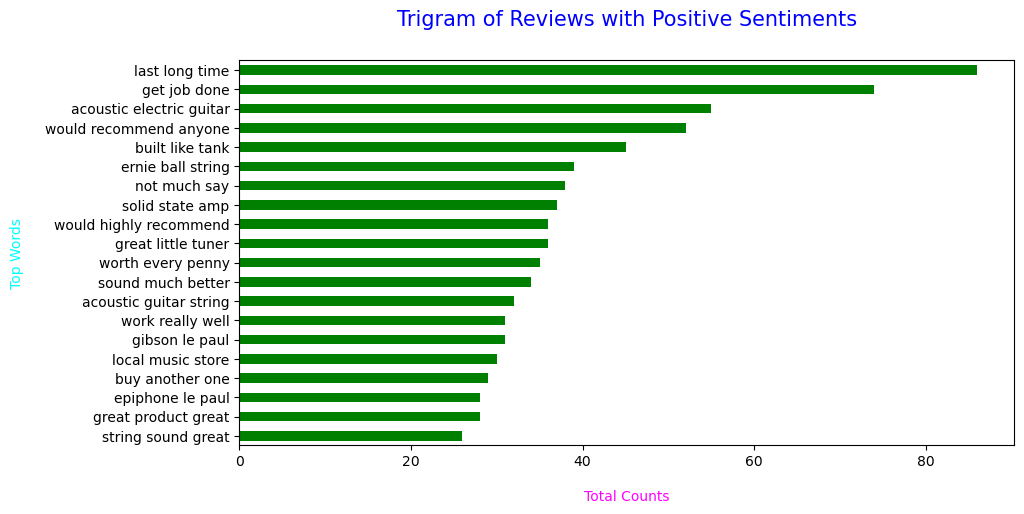

In [47]:
# Finding Trigram
words = Gram_Analysis(Positive["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

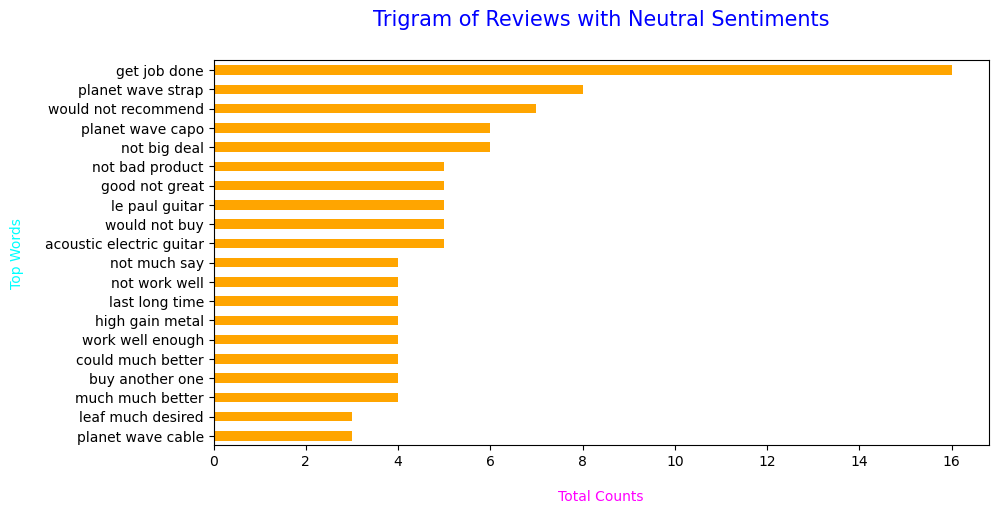

In [48]:
# Finding Trigram
words = Gram_Analysis(Neutral["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

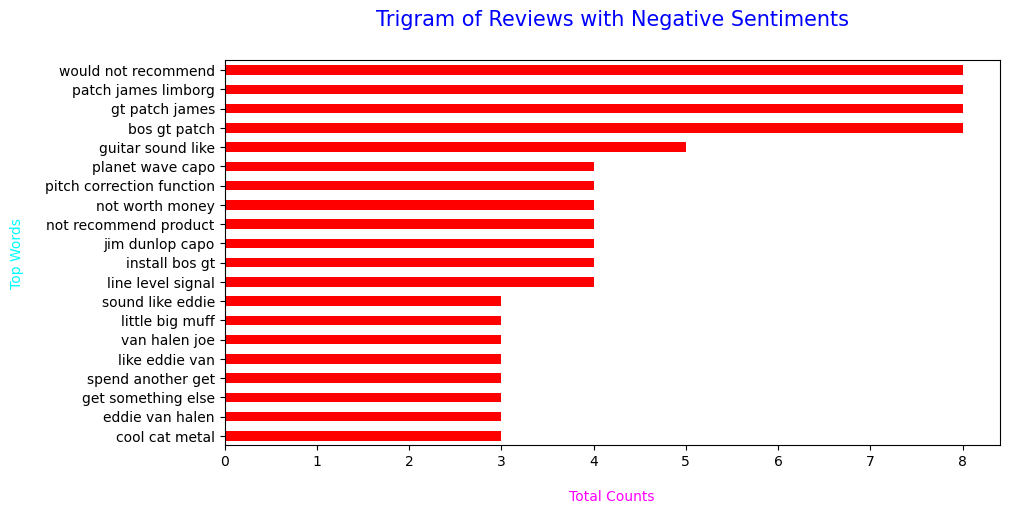

In [49]:
# Finding Trigram
words = Gram_Analysis(Negative["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*The analysis of the three types of n-grams (unigrams, bigrams, and trigrams) revealed that bigrams and trigrams are more accurate in describing sentiments than unigrams. The top words/phrases found in the analysis provide insights into the most frequently purchased items, with guitars being a prominent object. Additionally, the decision to keep the word "not" in the list of stopwords allowed the analysis to capture the meaning of negation phrases in the data..*



---



# Word Clouds

**A word cloud is a visual representation of text data where the size of each word is proportional to its frequency in the text. The words are arranged in a way that makes them easy to read and understand. Word clouds can help us quickly identify the most common words in a text or set of texts, and can give us an idea of the main themes or topics present in the data.**

**Word Cloud of Reviews with Positive Sentiments**

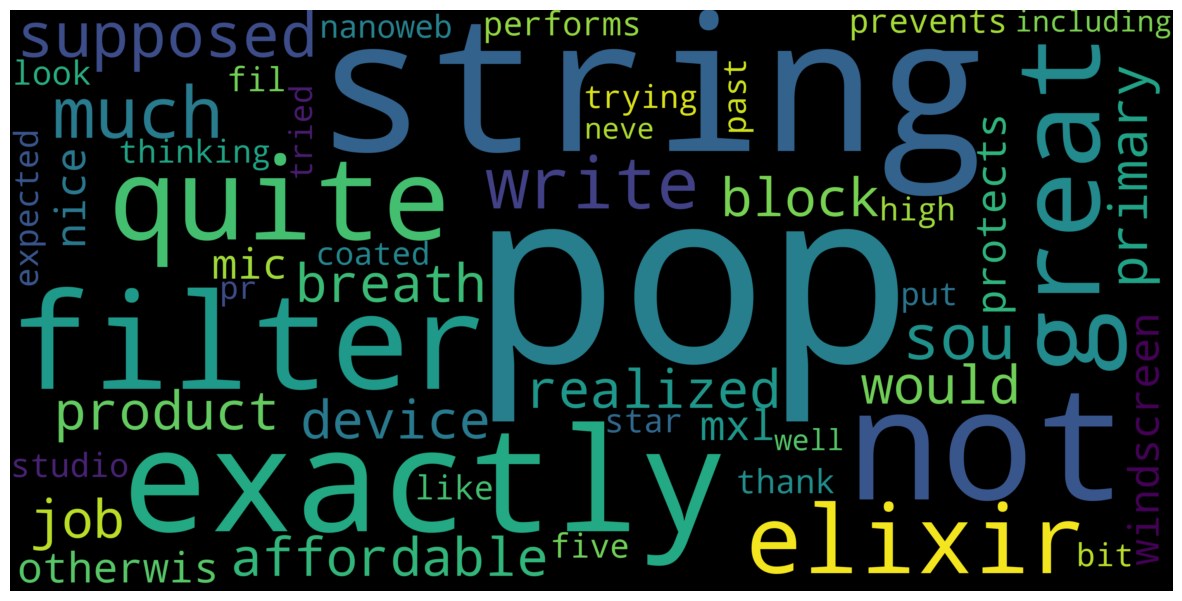

In [50]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**Word Cloud of Reviews with Neutral Sentiments**

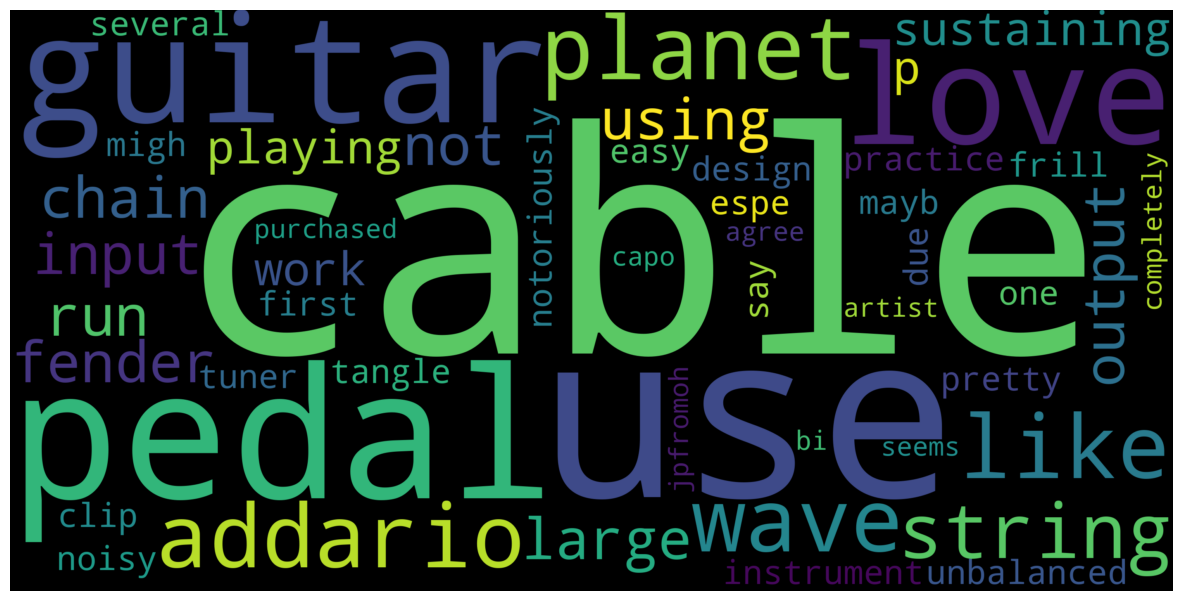

In [52]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**Word Cloud of Reviews with Negative Sentiments**

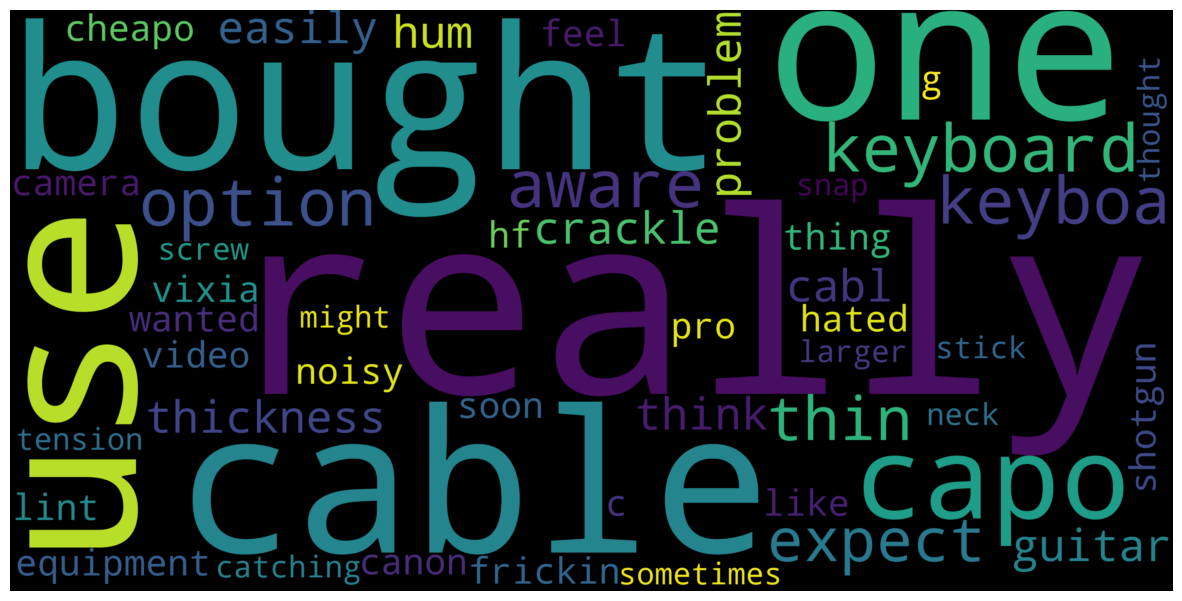

In [53]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

*From these word clouds, not only we can see words that really describe our sentiments, but just like our N-Grams Analysis we can see objects being discussed in the reviews given.*



---



# Feature Engineering

**Feature engineering is the process of creating new features or modifying existing features from raw data to improve the performance of machine learning models. It involves selecting, transforming, and combining relevant features in a way that captures the most important information and patterns in the data. This process is important because the quality of the features used in a model can have a significant impact on the accuracy and efficiency of the model. Good feature engineering can also reduce overfitting and improve interpretability.**

**Drop Insignificant Columns**

In [54]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

*We removed some unnecessary columns to simplify our dataset. Now, we only have two columns as inputs and one column as the output. Before proceeding further, we need to represent our output categories as numbers.*

**Current State of The Dataset**

In [55]:
dataset.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


**Encoding Our Target Variable**
 
**The code below is creating a LabelEncoder object,  that converts categorical labels (e.g. "Positive", "Neutral", "Negative") to numerical labels (e.g. 0, 1, 2).**

***The fit_transform method of the LabelEncoder object is then used to transform the "sentiment" column of the dataset DataFrame from categorical labels to numerical labels.**

In [56]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [57]:
dataset["sentiment"].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

*After encoding our sentiments into numbers, we need to assign weights to each word in a review. We can achieve this by using TF-IDF Vectorizer, which calculates the importance of a word in a document by considering how often it appears in the document and how often it appears in the whole corpus of documents. This way, we can get a better representation of the importance of each word in the review for our machine learning model to use.*

**TF-IDF Vectorizer**

In [58]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [59]:
# Declaring our target variable
y = dataset["sentiment"]

*We have transformed our reviews into a matrix of weighed words using TF-IDF Vectorizer, which has a total of 5000 bigram words. However, our dataset has imbalanced sentiment values, with few neutral and negative compared to positive. So, we need to balance our dataset before moving to the next step of modelling.*

**Resampling Our Dataset**

*To handle an imbalanced dataset, we can use methods like SMOTE or Bootstrap Method. In this case, we are going to use SMOTE, which will create new instances of our undersampled data to balance our dataset.*

In [60]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [61]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [62]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

*After using the SMOTE technique for resampling, our previously imbalanced dataset is now balanced. This can be confirmed by comparing the counts of each sentiment category before and after resampling.*

**Splitting Our Dataset**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

*We splitted our dataset into 75:25 portion respectively for the training and test set.*



---



# Model Selection and Evaluation

*To find the best model that fits our data, we need to try out different classification models and evaluate their performance using metrics like Confusion Matrix and F1 Score. We will also use cross-validation techniques to ensure that our model is reliable and can generalize well to new data.*

**Model Building**

*We are using K-Fold Cross Validation on the original dataset (before balancing) because it is not influenced by the imbalanced dataset. The CV will split the dataset and consider every validation, allowing us to obtain a reliable result. If we apply the CV to the balanced dataset obtained from resampling, we can expect similar results.*

In [64]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.8213612577370073
Logistic Regression Test Accuracy: 0.8818828283518491
SVC Test Accuracy: 0.8805184008381876
Random Forest Test Accuracy: 0.8766201449745754
Naive Bayes Test Accuracy: 0.8091794454219505


C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

K-Neighbors Test Accuracy: 0.8474810714983934


*We have tested six models using 10-Fold Cross Validation, and found that the Logistic Regression model has the highest accuracy among them, followed closely by SVC. Therefore, we will use the Logistic Regression model for predicting the sentiment. We will also tune its parameters and evaluate the final result to check how well the model performs.*

**Hyperparameter Tuning**

In [65]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447,

Best Accuracy: 94.79 %
Best Parameters: {'C': 6866.488450042998, 'penalty': 'l2'}


C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Our training set has an accuracy of 94.80%, which is good. Also, after performing Grid Search, we have found the best hyperparameters for our Logistic Regression model. Now, we can use these hyperparameters to create the final version of our Logistic Regression model, which should be the best version of the model for our sentiment analysis task.*

**Best Model**

In [66]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

C:\Users\Dhiman Thakuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Now that our model is done, we will test our model on our test set. The metrics that we will evaluate is based on this prediction that we made here.*

**Metrics**

Accuracy On Test Set

In [67]:
accuracy_score(y_test, Prediction)

0.9521205851928476

*Although our logistic regression model achieved a high accuracy of 95.21%, it's important to evaluate its performance using the Confusion Matrix and F1 Score. These metrics will help us understand how well our model is predicting the sentiment categories.*

Confusion Matrix

*A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of correctly and incorrectly classified samples for each class. The predicted class labels are compared with the true class labels, and four outcomes can occur: true positive, false positive, true negative, and false negative. These outcomes are then arranged in a table, where the rows represent the true class labels and the columns represent the predicted class labels. The diagonal elements of the table correspond to the correctly classified samples, while the off-diagonal elements correspond to the misclassified samples.*

In [68]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

Visualizing Our Confusion Matrix

In [69]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


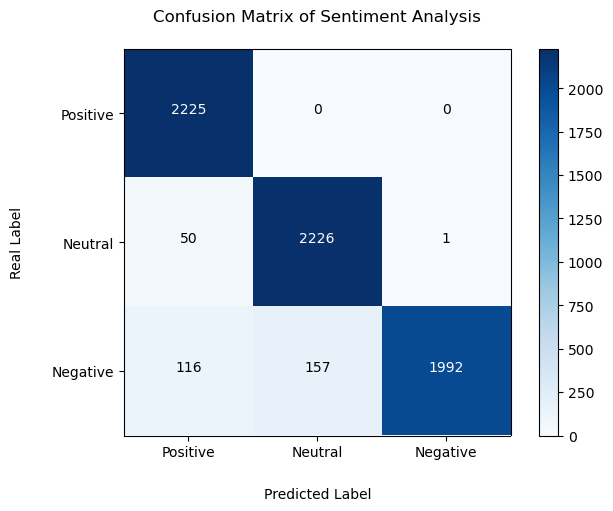

In [70]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

*The Confusion Matrix shows that the model performs well in general. It correctly identifies positive and neutral sentiments, but it struggles a bit with negative sentiments. This is due to the imbalanced nature of the original dataset, which was addressed by using SMOTE resampling. Despite this, the model is still able to make accurate predictions.*

Classification Scores

In [71]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2225
           1       0.93      0.98      0.96      2277
           2       1.00      0.88      0.94      2265

    accuracy                           0.95      6767
   macro avg       0.95      0.95      0.95      6767
weighted avg       0.95      0.95      0.95      6767



*Our model's F1 Score is 95% for each sentiment category, which is a great indicator of its performance on the dataset. Therefore, we can conclude that the model is effective in categorizing the sentiment of the reviews.*



---



# Conclusion

**Dataset**


Although our dataset contains many features related to user reviews on musical instruments, not all of them are crucial for sentiment analysis. Therefore, we can omit some of these features to simplify our model. In addition, we may want to reconsider removing stopwords in the preprocessing phase, as some of these words may be important in determining the sentiment of the users' reviews.

Also, our text analysis revealed that most of the transactions were related to guitars or other string-based instruments. This suggests that guitars are very popular among customers, and sellers can focus on promoting their guitar products to attract more customers.


**Model**



1. We tried different models and found that Logistic Regression performed the best in predicting sentiment. We fine-tuned it and got good results.

2. When we used our model to predict sentiment on the test set, we got high accuracy and F1 score, which means our model works well.

3. In the future, we might try a different Cross Validation Methods and consider data scaling for even better results.




---



# Sources of Learning



1.   [Text Preprocessing in Python: Steps, Tools, and Examples](https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908)
2.   [Amazon Instrument: Sentimental Analysis](https://www.kaggle.com/nayansakhiya/amazon-instrument-sentimental-analysis)
3.   [Sentiment Analysis | Amazon reviews](https://www.kaggle.com/benroshan/sentiment-analysis-amazon-reviews#Story-Generation-and-Visualization-from-reviews)
4.   [SMOTE for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)